# Binary Classification on Wage Class using XGBoost Algorithm

In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

#### Attribute Information:
- Listing of attributes: >50K, <=50K.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [1]:
# read datasets
import pandas as pd

In [2]:
train_set = pd.read_csv('./data/wage_train_set.csv')
test_set = pd.read_csv('./data/wage_test_set.csv')

# add train/test set data identifier field and merge them for preprocess them
train_set['id'] = 0
test_set['id'] = 1

df = pd.concat([train_set, test_set], axis=0)

In [3]:
# check dataframe rows
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [4]:
# view data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
 15  id              48842 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.3+ MB


In [ ]:
# only 6-variables are neumetric and remaining variables are categorical

In [5]:
# view description of the neumerical variables
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,id
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.333340
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.471412
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [6]:
# check if any null exists in the dataframe
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
id                0
dtype: int64

In [7]:
# find neumerical variables
numerical_columns = list(df.columns[df.dtypes!='object'])
numerical_columns

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'id']

In [8]:
import matplotlib.pyplot as plt

def plot_histogram(df, col_name=None):
    x_max = df[col_name].max()
    plt.figure(figsize=(7, 5))
    plt.xlim(0, x_max)
    plt.xlabel(col_name)
    plt.ylabel('Records')
    plt.hist(df[col_name], color="lightblue", ec="red")
    plt.show()
    return

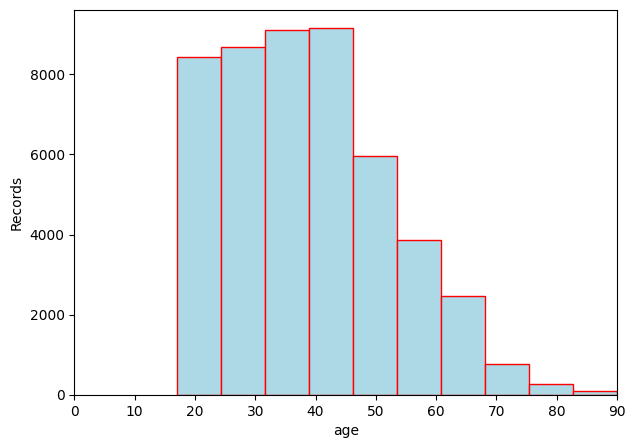

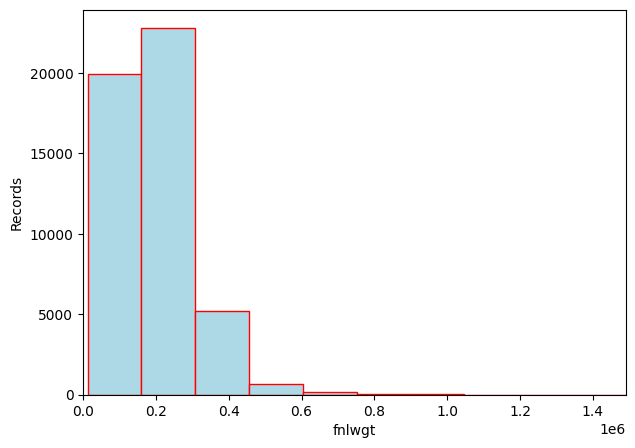

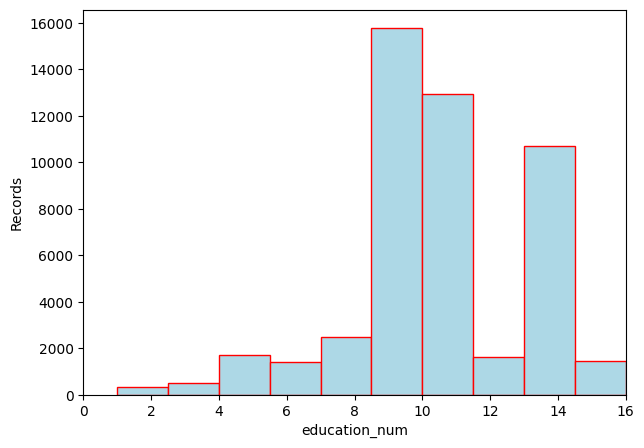

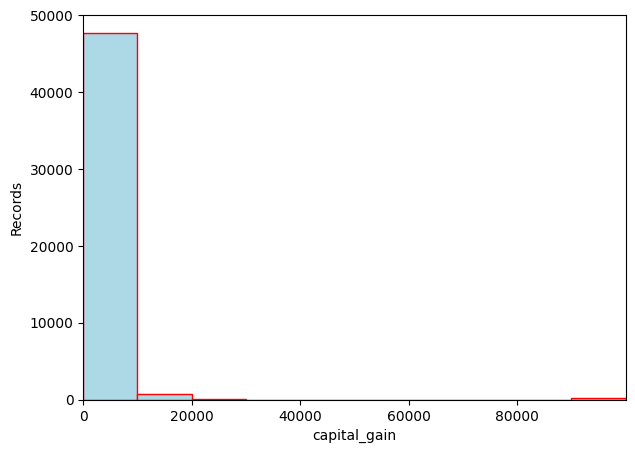

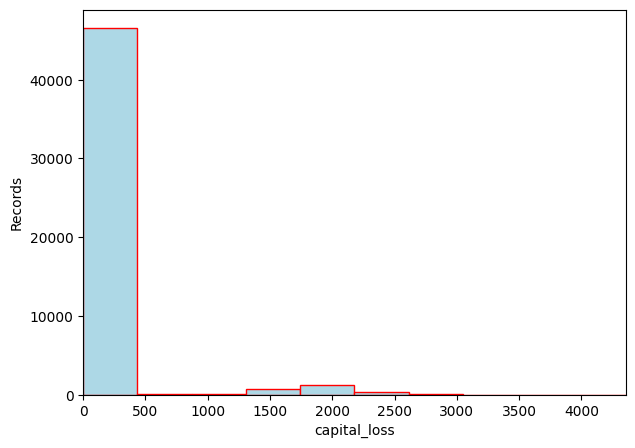

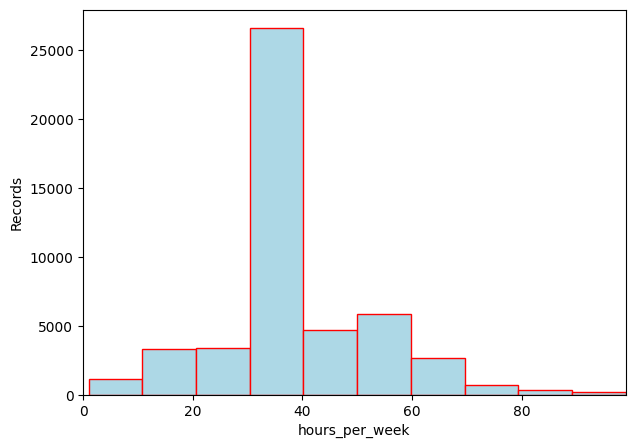

In [9]:
# visualize histogram for numerical variables
numcols = numerical_columns[:-1]
df_num = df[numcols]

for col in numcols:
    plot_histogram(df_num, col_name=col)

In [10]:
# find categorical variables
categorical_columns = list(df.columns[df.dtypes=='object'])
categorical_columns

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'wage_class']

In [11]:
# Data Visualization with Barplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_barplot(df, col_name=None, sns_color="coolwarm"):
    f_count = df[col_name].value_counts().sort_values(ascending=False).to_frame()
    f_count = f_count.rename(columns={col_name: 'count'})

    n = f_count.shape[0]
    nl = [i for i in range(n)]
    cplt = np.array(sns.color_palette(sns_color, n)).take(nl, axis=0)

    ax = sns.barplot(x=f_count.index, y='count', data=f_count, palette=cplt)

    for p in ax.patches:
        ax.annotate(
            format(p.get_height()),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0,9),
            textcoords='offset points'
        )
    return


def barplot(df, col, h=12, w=5):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(h, w)})
    plt.gca().set(xlabel=col, ylabel='count')
    create_barplot(df, col_name=col)
    plt.xticks(rotation=60)
    plt.show()

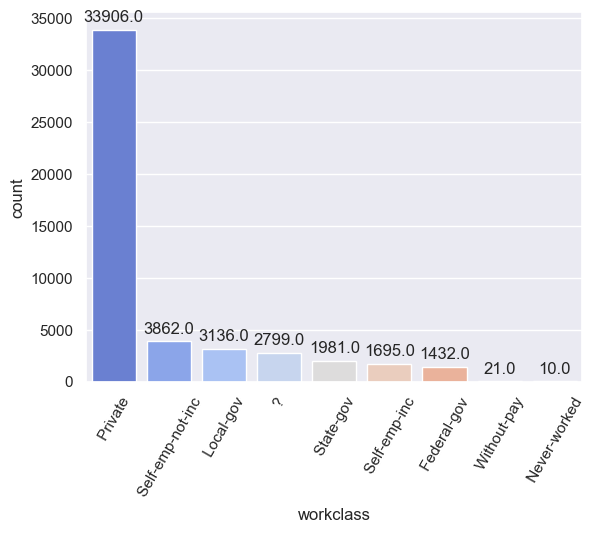

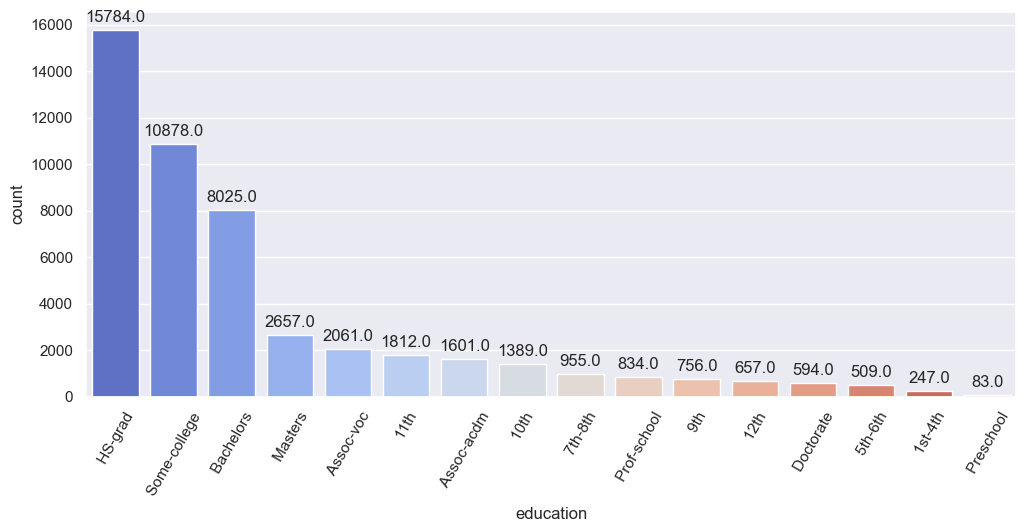

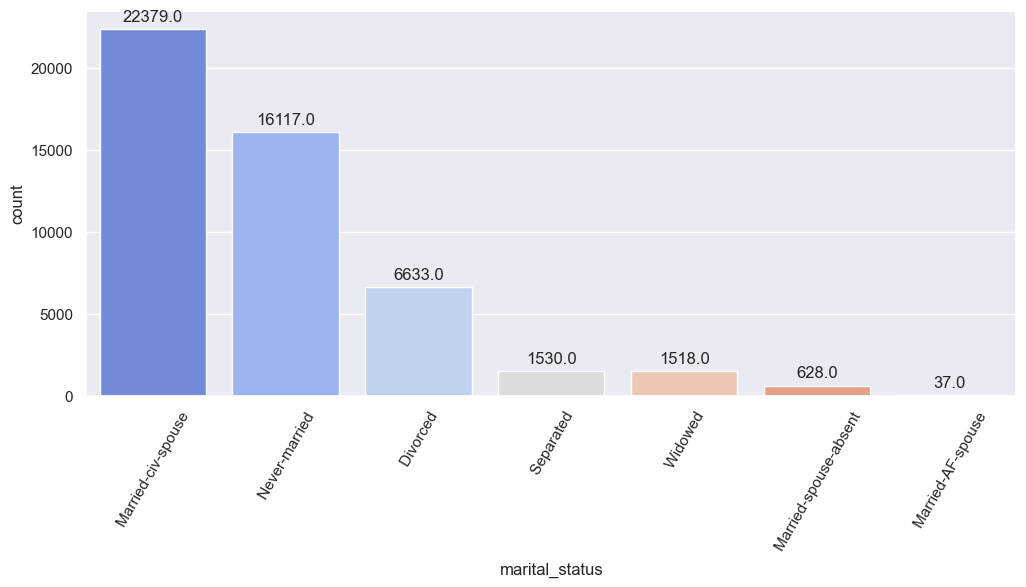

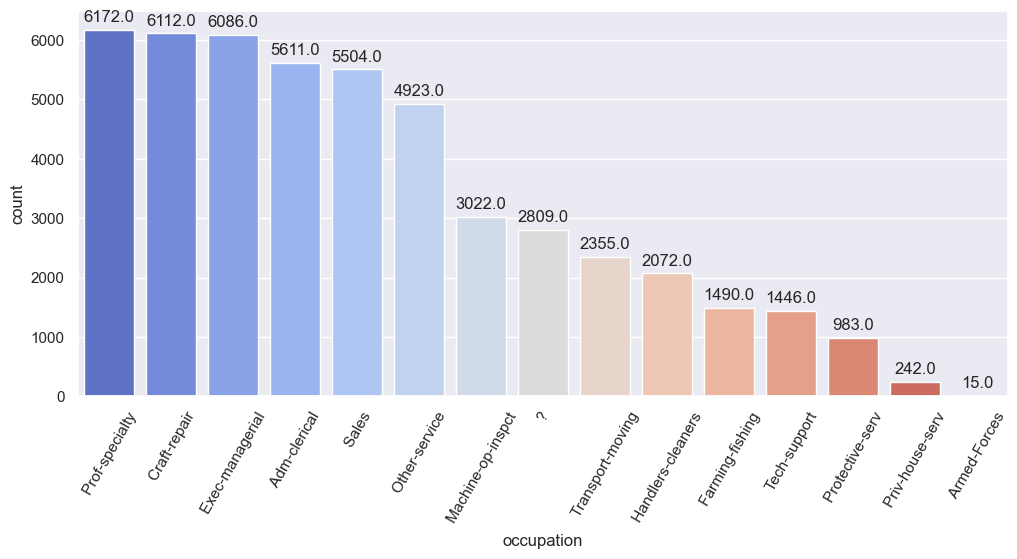

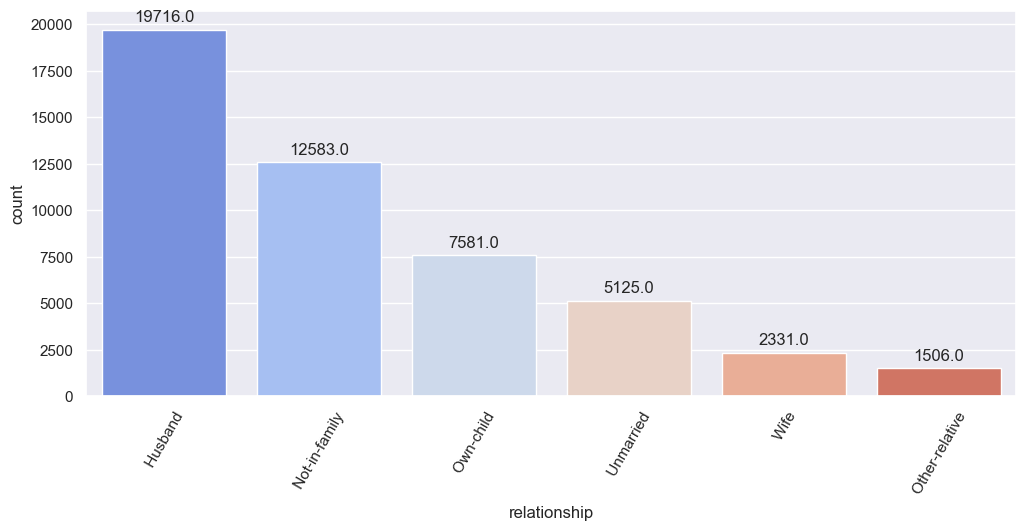

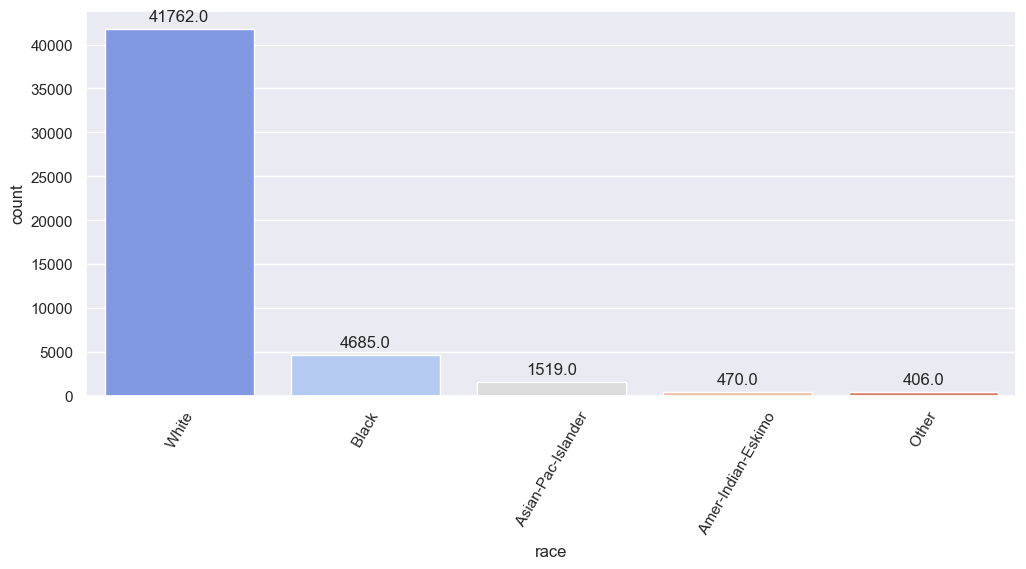

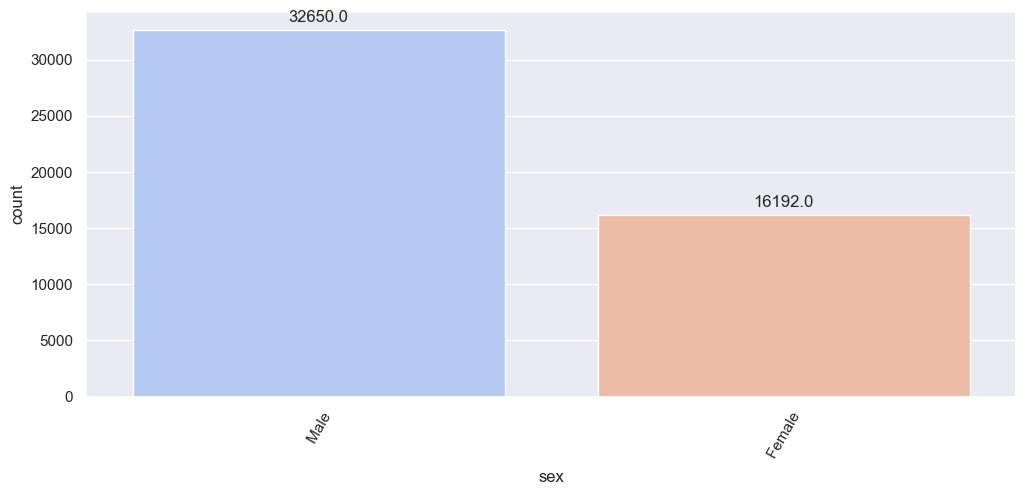

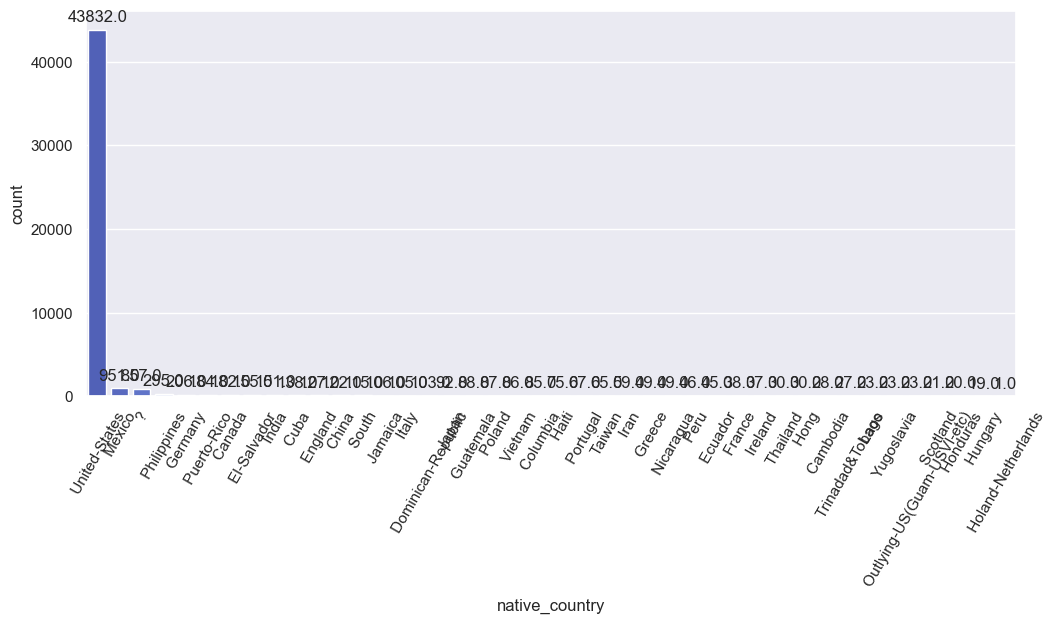

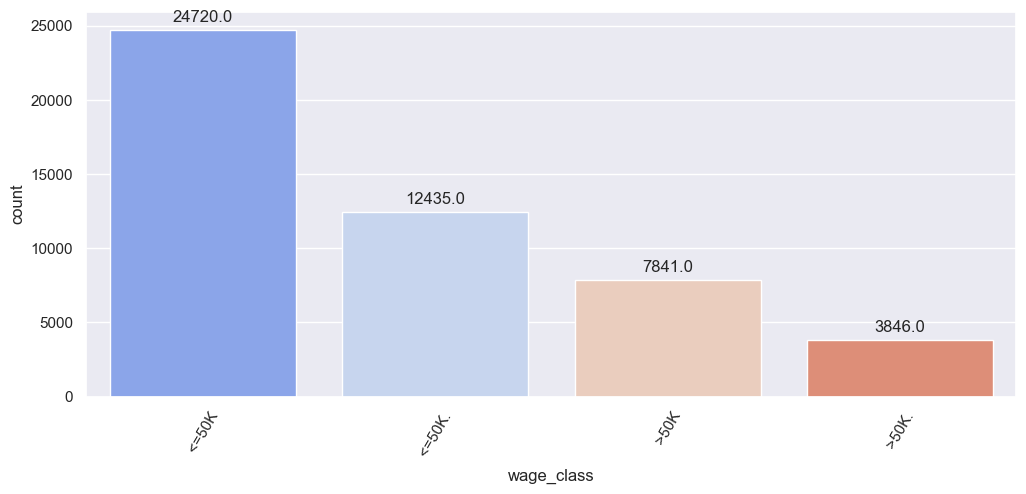

In [12]:
# visualize barplot for categorical variable
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for col in categorical_columns:
    barplot(df, col, h=12, w=5)


In [13]:
# it is observed that some categorical variables have '?' symbol, thereby replacing '?' with 'unknown' as value
df.replace(' ?', 'unknown', inplace=True)
df.replace('?', 'unknown', inplace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [14]:
# check unique value for wage class
df.wage_class.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [15]:
df.wage_class.replace(' <=50K.', ' <=50K', inplace=True)
df.wage_class.replace(' >50K.', ' >50K', inplace=True)
df.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
# add numerical identity to unique wage class
df['wage_class_id'] = df['wage_class'].replace({' <=50K': 0, ' >50K': 1})
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,id,wage_class_id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0


In [17]:
# it is seen that the variable education has several sub-class that can be grouped to make a one sub-class:
def primary_education(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary Education'
    else:
        return x


In [18]:
df['education'] = df['education'].apply(primary_education)

In [19]:
# it is seen that the variable native_country has many sub-class (country) and this can be group into few sub-class based on their geographical position.
def geography_location(country):
    if country in [' United-States',' Canada']:
        return 'North America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'European Union'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asia'
    else:
        return country

In [20]:
df['native_country'] = df['native_country'].apply(geography_location)

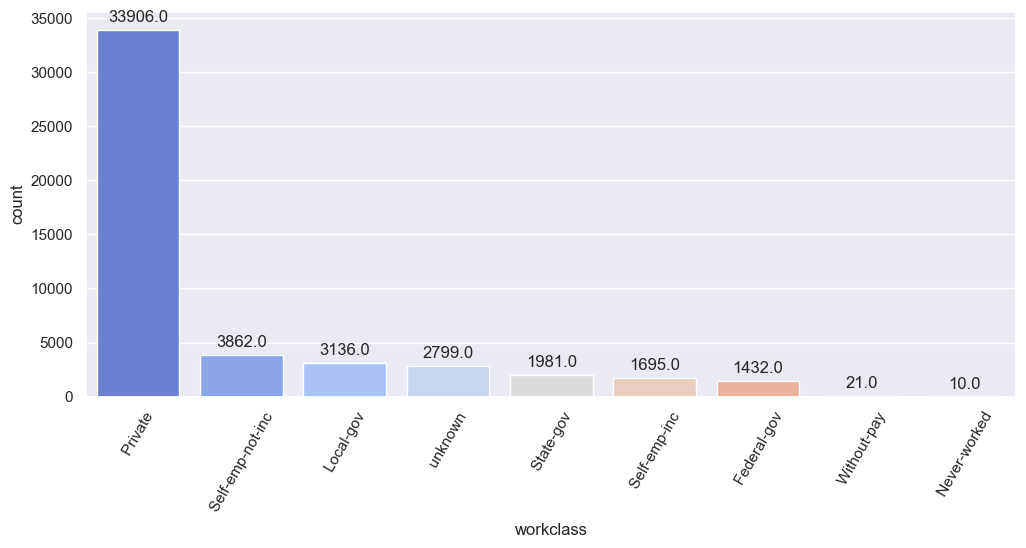

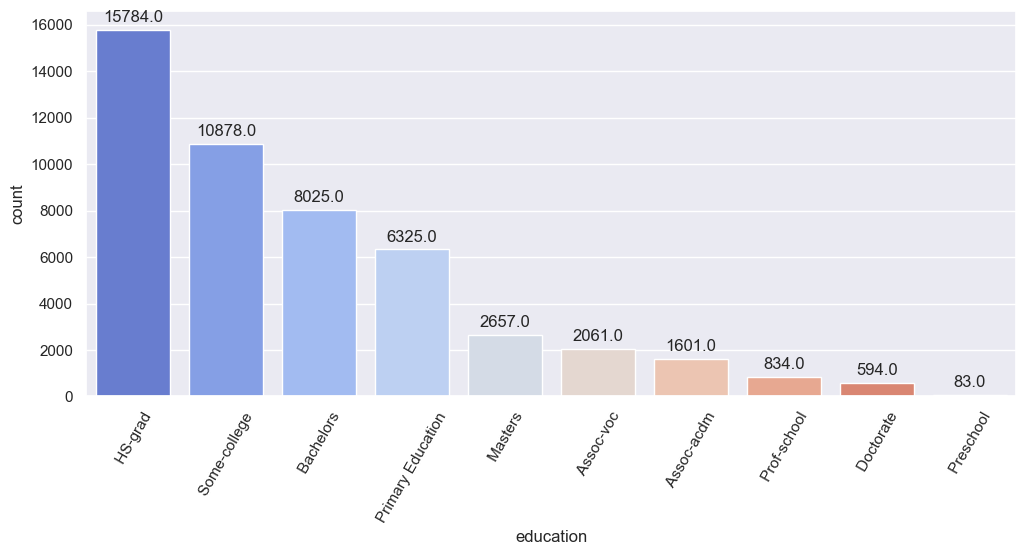

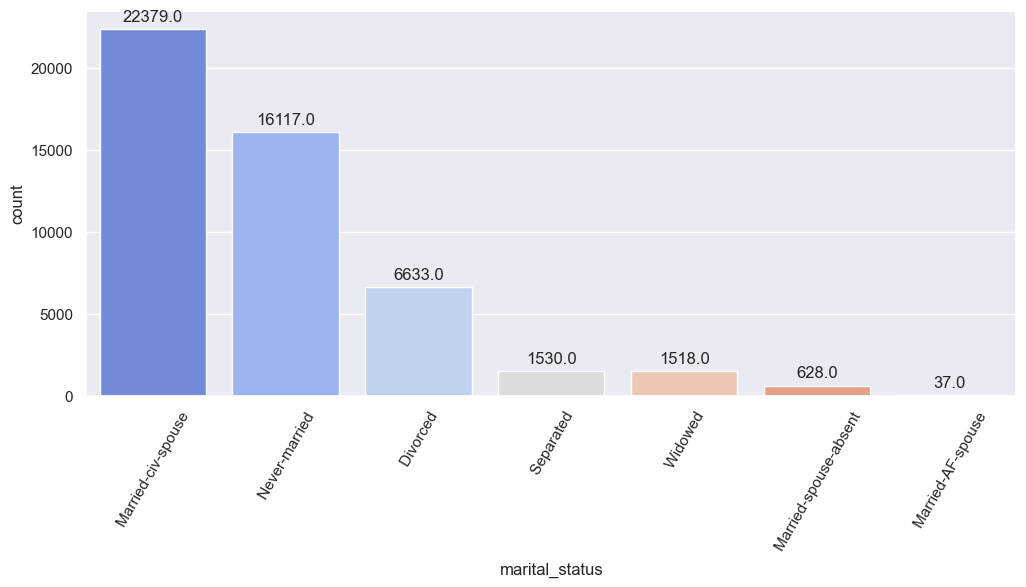

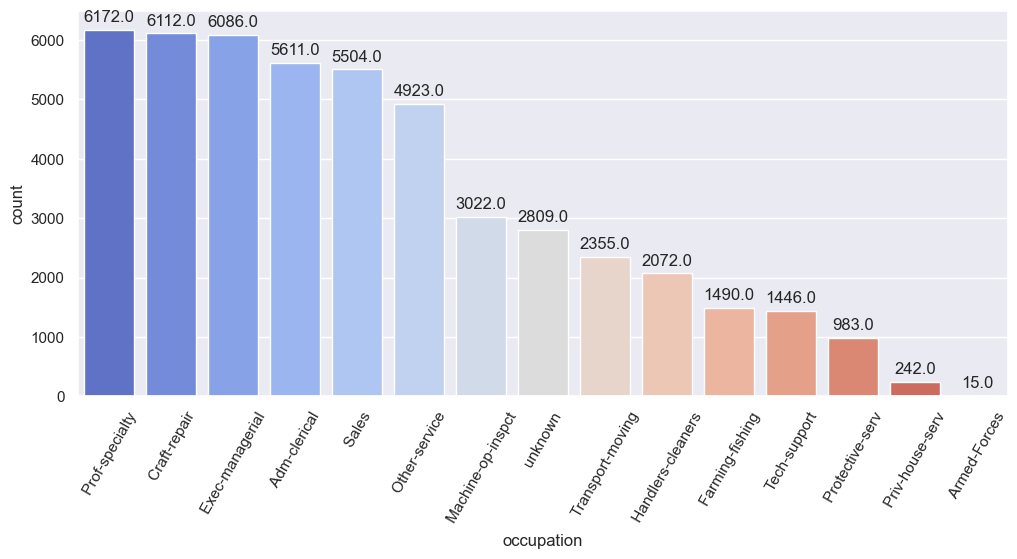

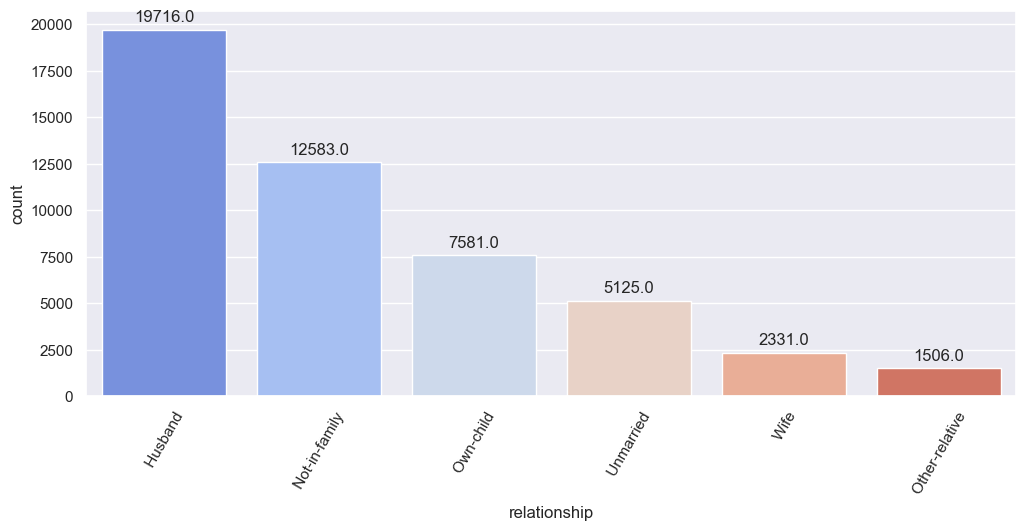

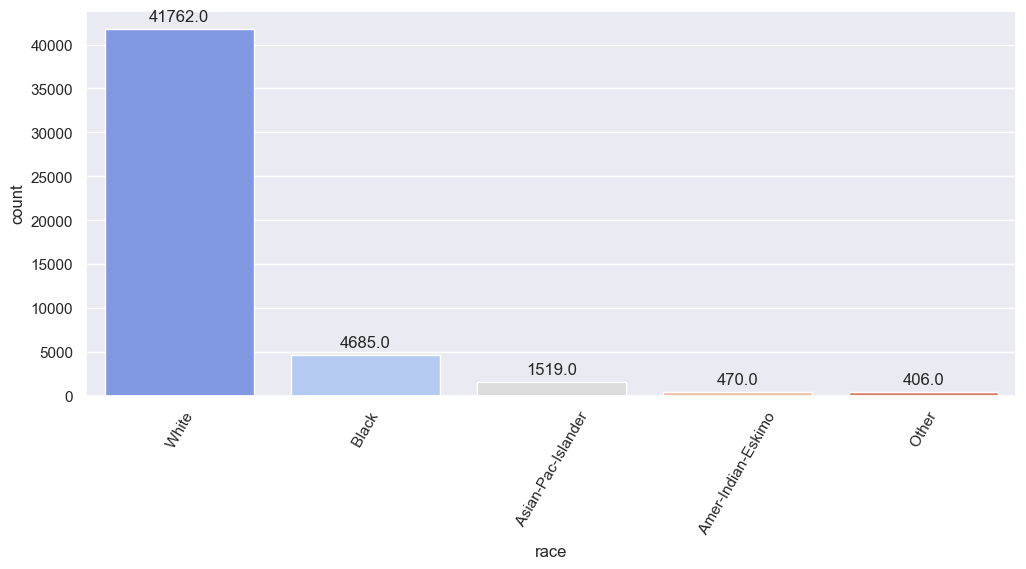

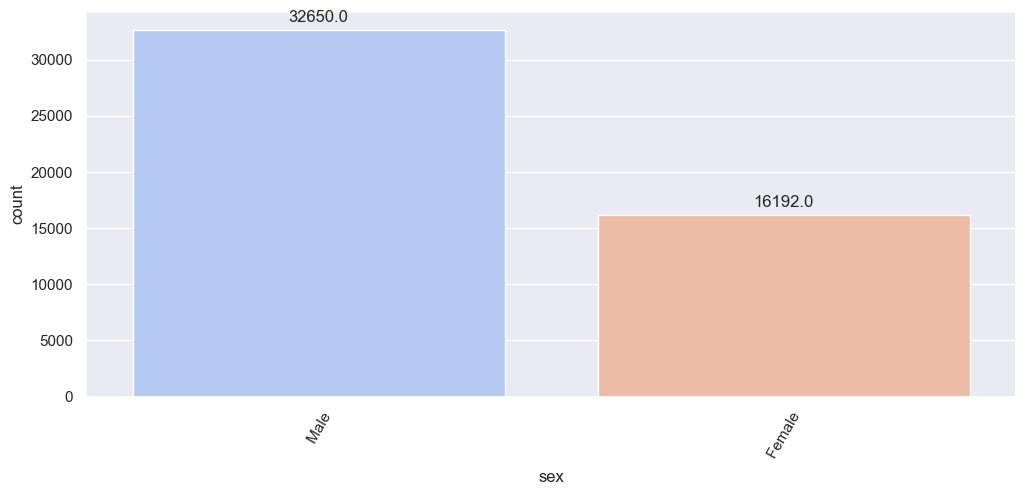

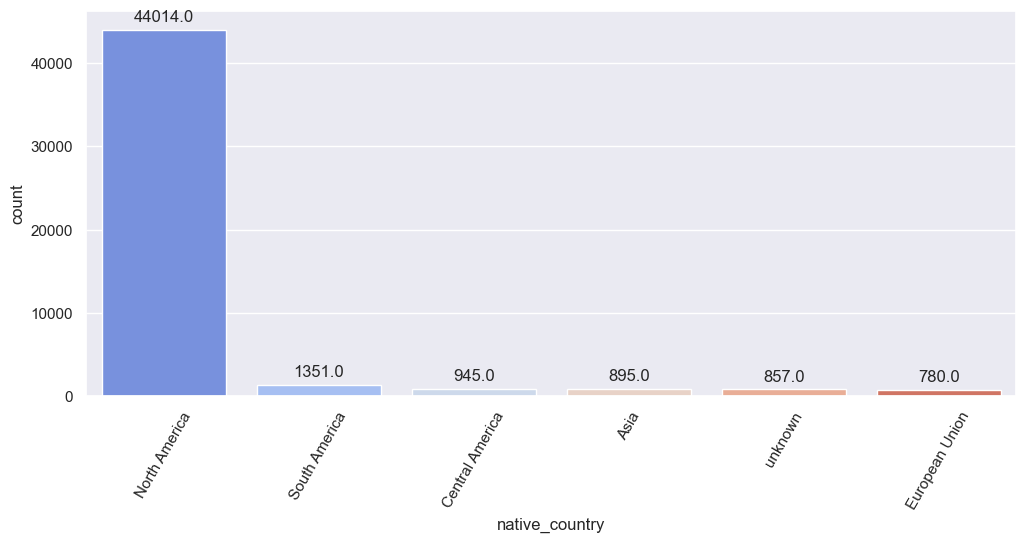

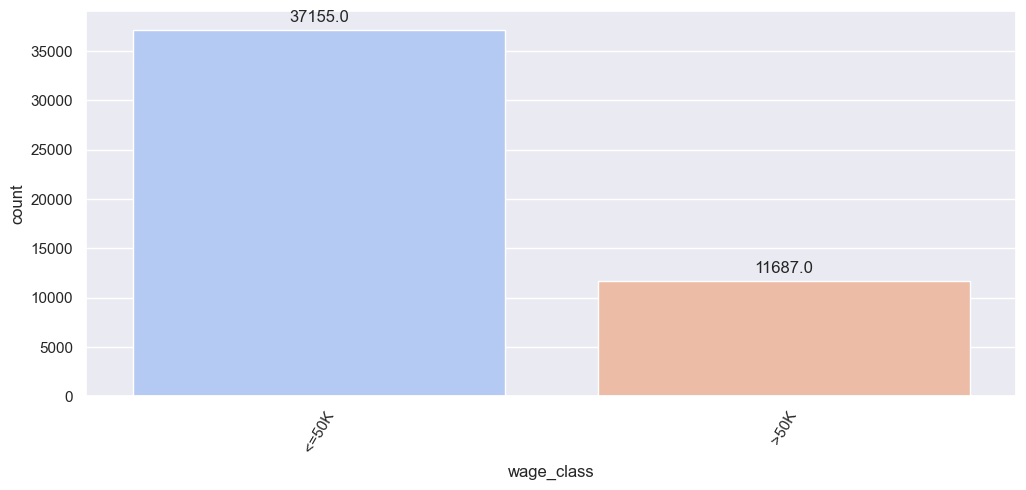

In [21]:
# visualize after correction
for col in categorical_columns:
    barplot(df, col, h=12, w=5)

In [22]:
# view count plot for categorical variables
def create_countplot(df, x_col=None, y_col="wage_class_id", txt_msg=None):
    plt.figure(figsize=(12,6))
    sns.set_style("darkgrid")
    sns.countplot(data=df, x=x_col, hue=y_col)
    plt.title(txt_msg)
    plt.xticks(rotation=60)
    plt.show()
    return

<Figure size 1200x500 with 0 Axes>

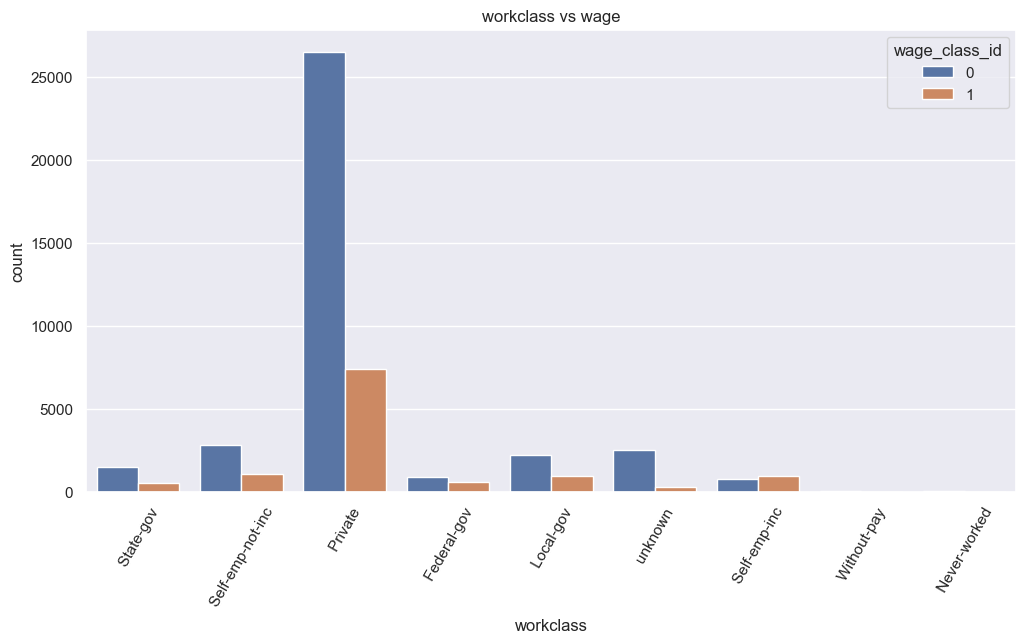

<Figure size 1200x500 with 0 Axes>

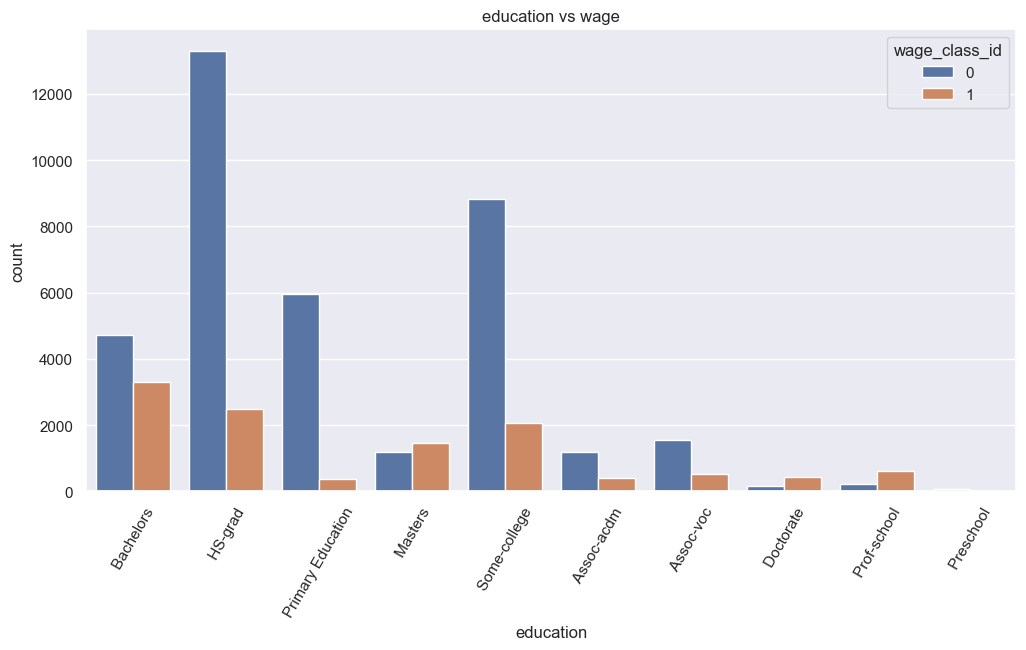

<Figure size 1200x500 with 0 Axes>

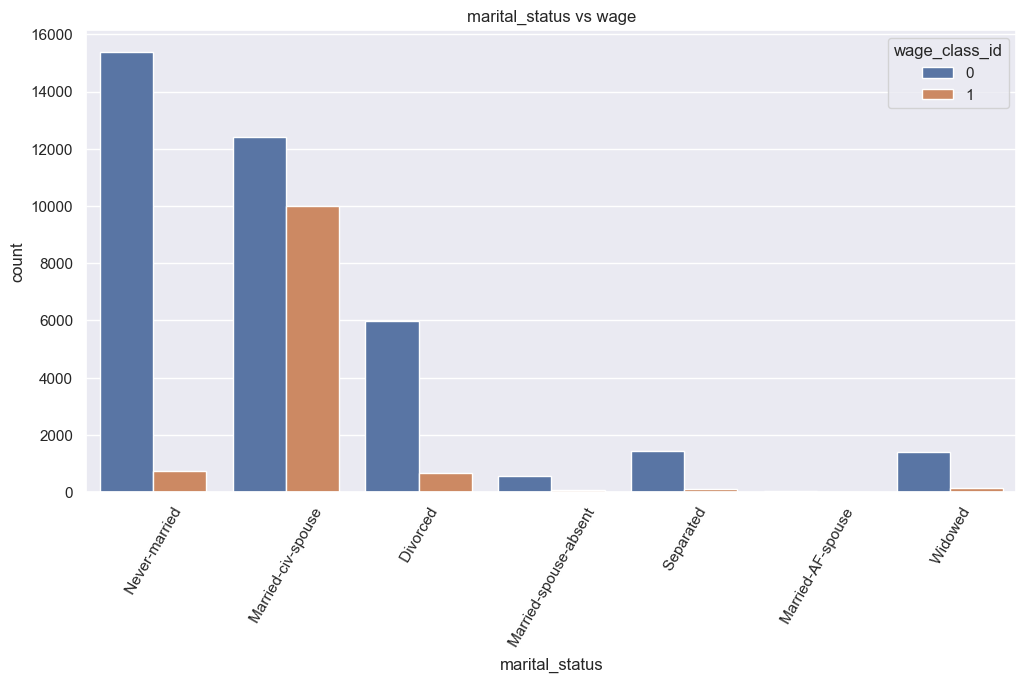

<Figure size 1200x500 with 0 Axes>

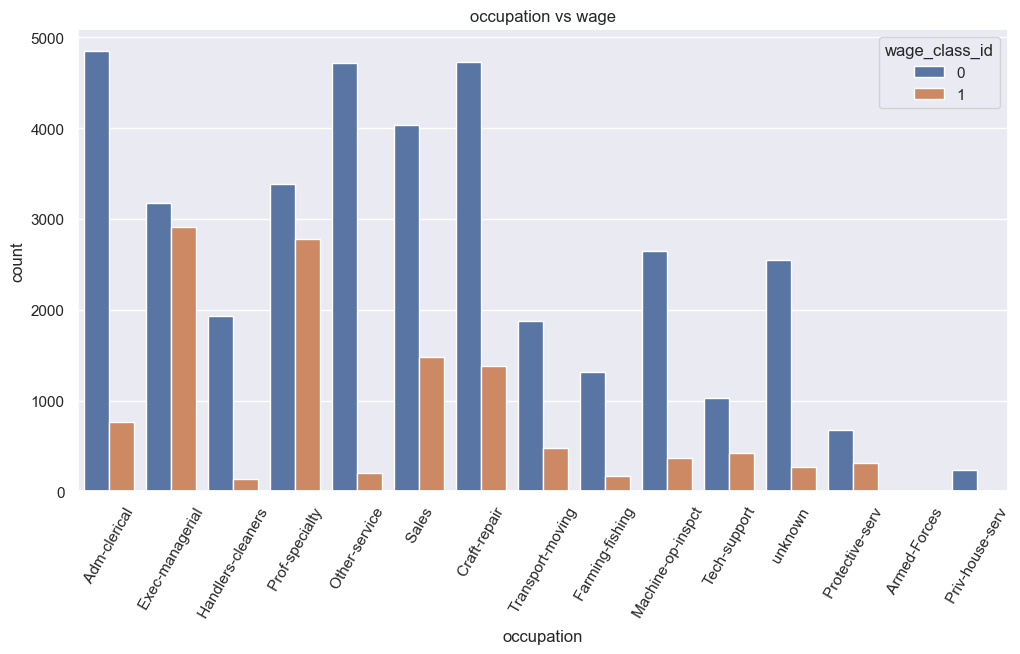

<Figure size 1200x500 with 0 Axes>

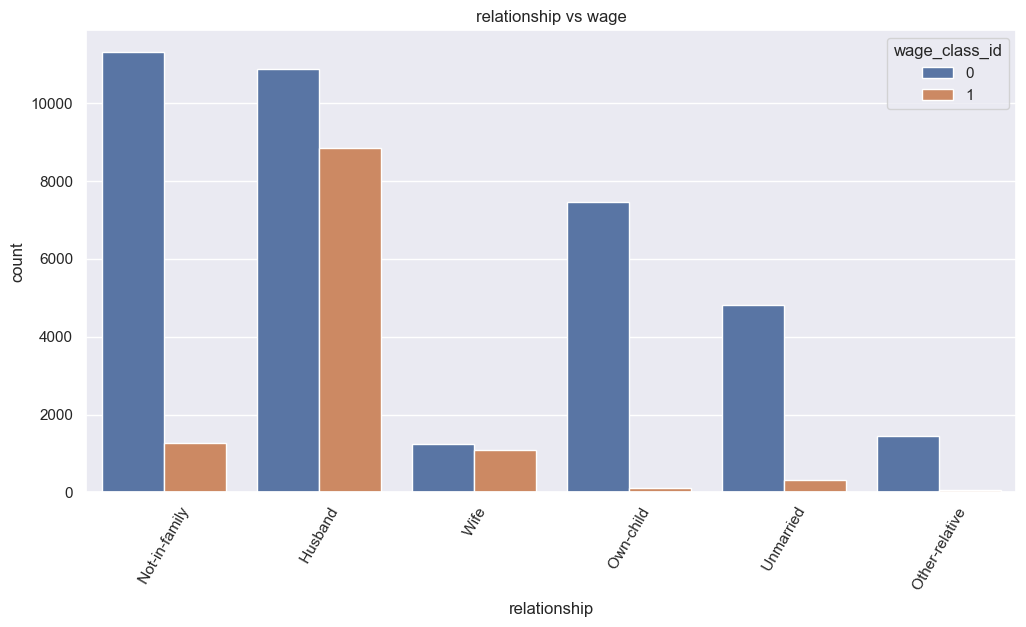

<Figure size 1200x500 with 0 Axes>

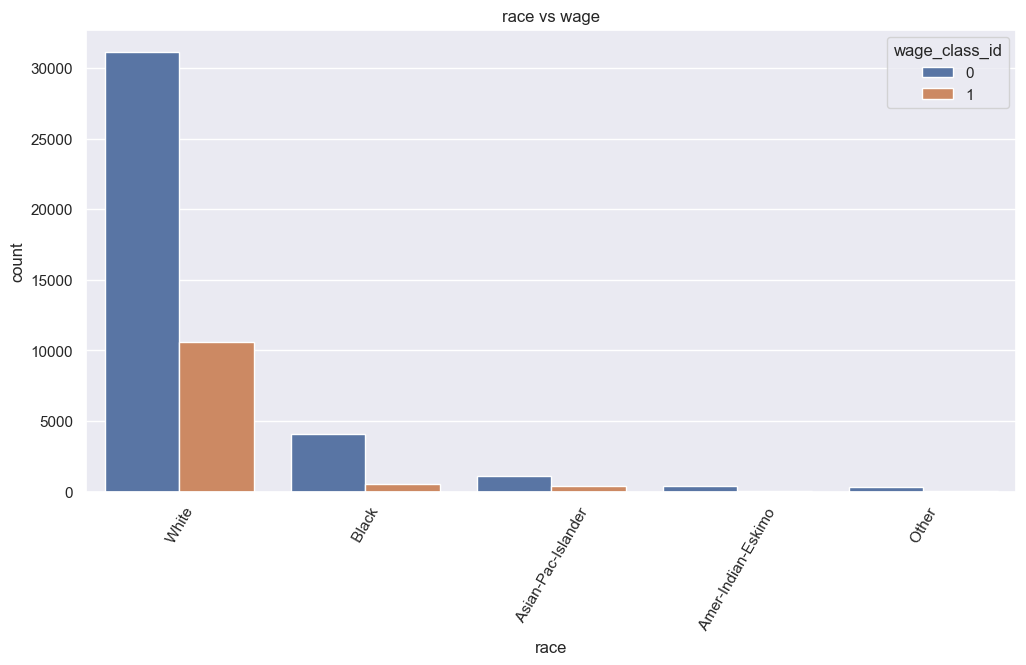

<Figure size 1200x500 with 0 Axes>

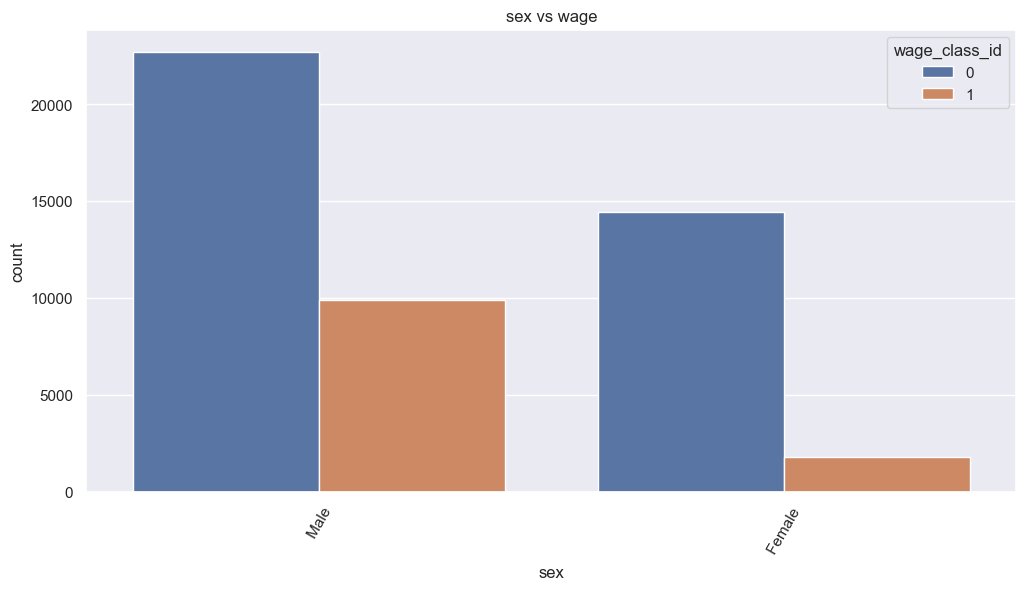

<Figure size 1200x500 with 0 Axes>

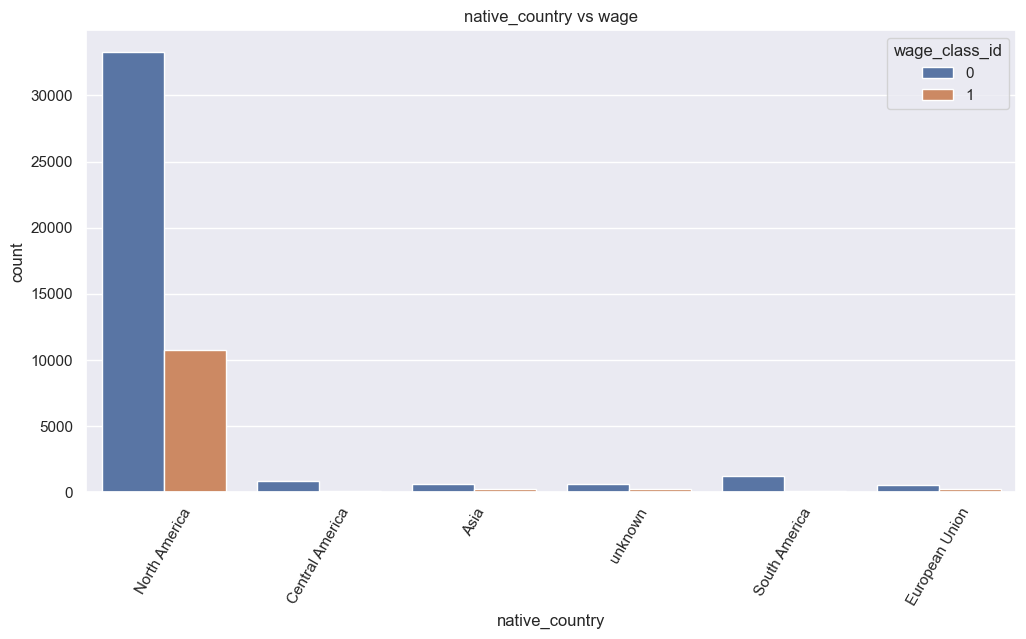

In [23]:
n_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for col in n_columns:
    plt.figure()
    plt.tight_layout()
    create_countplot(df.astype(str), x_col=col, txt_msg=col+' vs wage')

In [24]:
# view histogram for numerical variables
def compare_histogram(df, x_col, y_col="wage_class_id"):
    sns.FacetGrid(df, col=y_col).map(plt.hist, x_col)
    plt.show()
    return

<Figure size 1200x500 with 0 Axes>

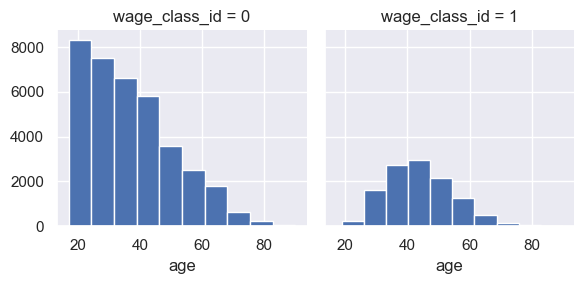

<Figure size 1200x500 with 0 Axes>

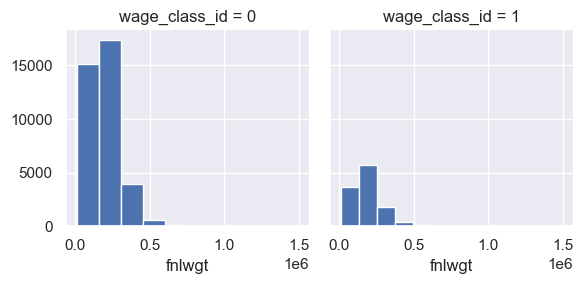

<Figure size 1200x500 with 0 Axes>

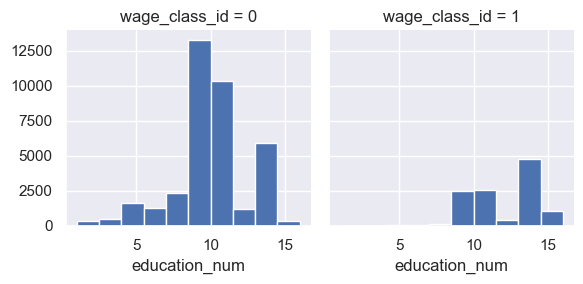

<Figure size 1200x500 with 0 Axes>

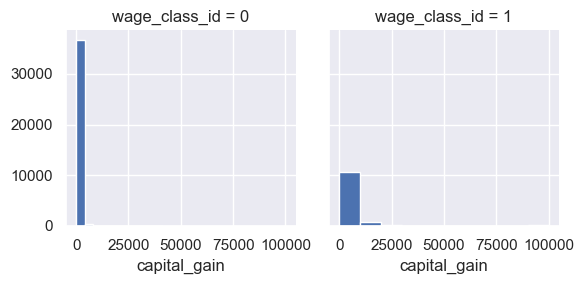

<Figure size 1200x500 with 0 Axes>

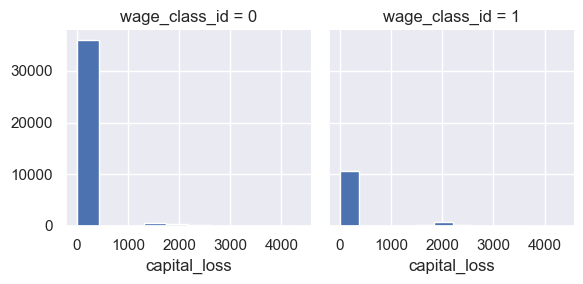

<Figure size 1200x500 with 0 Axes>

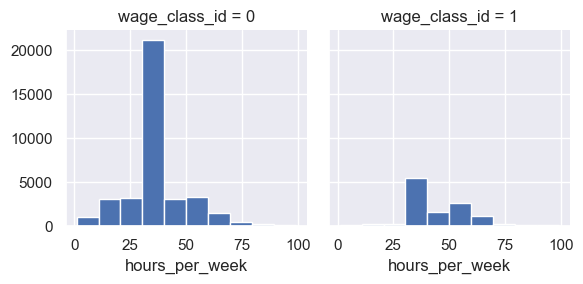

In [25]:
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

for col in num_cols:
    plt.figure()
    plt.tight_layout()
    compare_histogram(df, col)

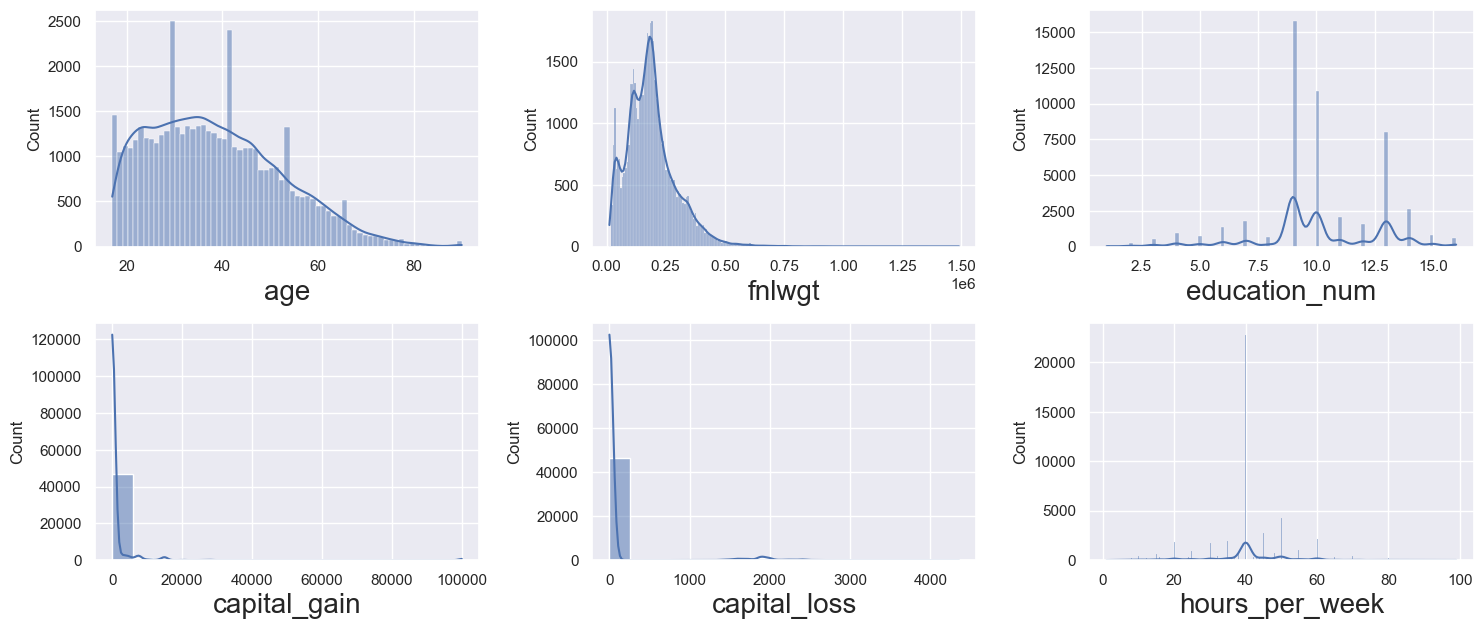

In [26]:
# checking the data - normalized or not
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
plt.figure(figsize=(15, 9))
pltnumber = 1
for column in num_cols:
    if df[column].dtype != object:
        ax=plt.subplot(3, 3, pltnumber)
        sns.histplot(x=df[column], kde=True)
        plt.xlabel(column, fontsize=20)
        pltnumber+=1
plt.tight_layout()

<Axes: >

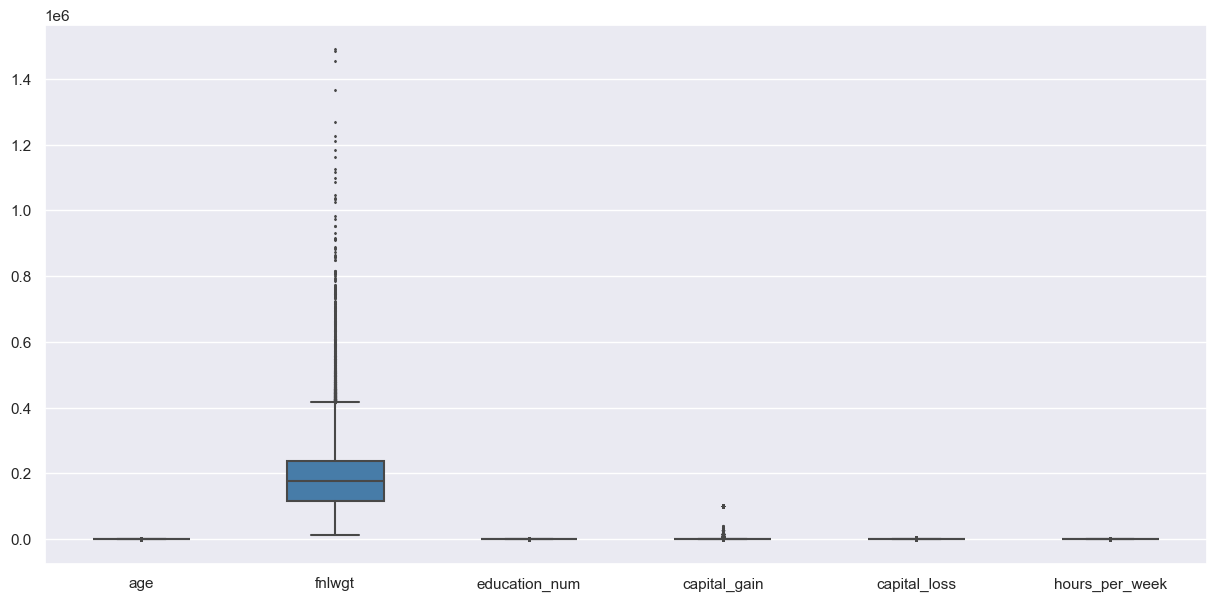

In [27]:
# Checking any outlier are present in the data with the help of Boxplot or scatterplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
fig, axes = plt.subplots(figsize=(15, 7))
sns.boxplot(data=df[num_cols], fliersize=1.2, width=0.5, ax=axes, palette='Set1')

In [ ]:
# it is seen that following variables have outlier: fnlwgt
# feature clipping for outlier variables is needed during model development

In [46]:
# correlation test
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'wage_class_id']
df_num = df[num_cols]
corr = df_num.corr(method='pearson')
corr.style.background_gradient(axis=None, cmap='Spectral')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class_id
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
education_num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital_gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital_loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours_per_week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
wage_class_id,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


In [62]:
# check the VIF (Variance Inflation Factors) Score to see if any collinearity between the variables exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.mode.chained_assignment = None  # default='warn'

cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# creating dummies for categorical variables
df_cat = df[cat_cols]
for col in cat_cols:
    subcat = df_cat[col].unique().tolist()
    scdict = {}
    for ix, sc in enumerate(subcat):
        scdict[sc] = ix
    df_cat[col] = df_cat[col].map(scdict)

# get numerical data
df_num = df[num_cols]

# concate
df2 = pd.concat([df_num, df_cat], axis=1)
df2

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,0
1,50,83311,13,0,0,13,1,0,1,1,1,0,0,0
2,38,215646,9,0,0,40,2,1,2,2,0,0,0,0
3,53,234721,7,0,0,40,2,2,1,2,1,1,0,0
4,28,338409,13,0,0,40,2,0,1,3,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0,0,36,2,0,2,3,0,0,1,0
16277,64,321403,9,0,0,40,5,1,6,11,5,1,0,0
16278,38,374983,13,0,0,50,2,0,1,3,1,0,0,0
16279,44,83891,13,5455,0,40,2,0,2,0,3,2,0,0


In [63]:
# calculating VIF for each feature: formula- vif = 1/(1 - r^2)
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif_data["feature"] = df2.columns
print(vif_data)

          VIF         feature
0    9.957515             age
1    3.890045          fnlwgt
2   13.035542   education_num
3    1.045425    capital_gain
4    1.061723    capital_loss
5   10.197899  hours_per_week
6    4.706934       workclass
7    2.412724       education
8    2.286935  marital_status
9    2.994648      occupation
10   2.258332    relationship
11   1.173989            race
12   1.748937             sex
13   1.139850  native_country


In [ ]:
# If we consider VIF > 5 then the following variables have a high variance inflation factor because they "explain" high variance within this dataset, 
# namely age, education_num, and hours_per_week. 
# We would need to discard some of these variables before moving on to model building with high multicolinearity.

In [ ]:
# Conclusion
#------------------
# -> numerical variables: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
# -> categorical variables: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
# -> target variable: ['wage_class_id']
# -> problem statement: binary classification
# -> it is seen that variables don't have very high collinearity, perhaps can be considered all the variables for model building
# -> +ve skewed numerical variables: capital_loss, capital_gain, fnlwgt, age
# -> -ve skewed numerical variable: education_num
# -> outlier: fnlwgt and capital_gain
# -> Normalization: for +ve, -ve, and normal distributed variables, min-max scalers/stnadard scalers needs to apply
# -> for outlier variables, Feature Clipping needs to apply